In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# data import path

path  = r'C:\Users\Layzr\Desktop\School\Data Immersion Part 4\Achievement 4'

In [3]:
# importing data

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merged.pkl'))

In [11]:
region_map = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',

    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest',
    'Ohio': 'Midwest', 'Wisconsin': 'Midwest', 'Iowa': 'Midwest',
    'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest',
    'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',

    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South',
    'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South',
    'Virginia': 'South', 'District of Columbia': 'South', 'West Virginia': 'South',
    'Alabama': 'South', 'Kentucky': 'South', 'Mississippi': 'South',
    'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    'Oklahoma': 'South', 'Texas': 'South',

    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West',
    'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West',
    'Utah': 'West', 'Wyoming': 'West', 'Alaska': 'West',
    'California': 'West', 'Hawaii': 'West', 'Oregon': 'West',
    'Washington': 'West'
}

# Apply the mapping
df['Region'] = df['state'].map(region_map)

In [18]:
def profile(row):
    if row['income'] < 40000 and row['age'] < 30 and row['n_dependants'] == 0:
        return 'Young Single'
    elif row['income'] > 100000 and row['n_dependants'] > 2:
        return 'Affluent Parent'
    elif row['department_id'] == 18:  # Baby products
        return 'Parent'
    else:
        return 'Other'

df['profile'] = df.apply(profile, axis=1)

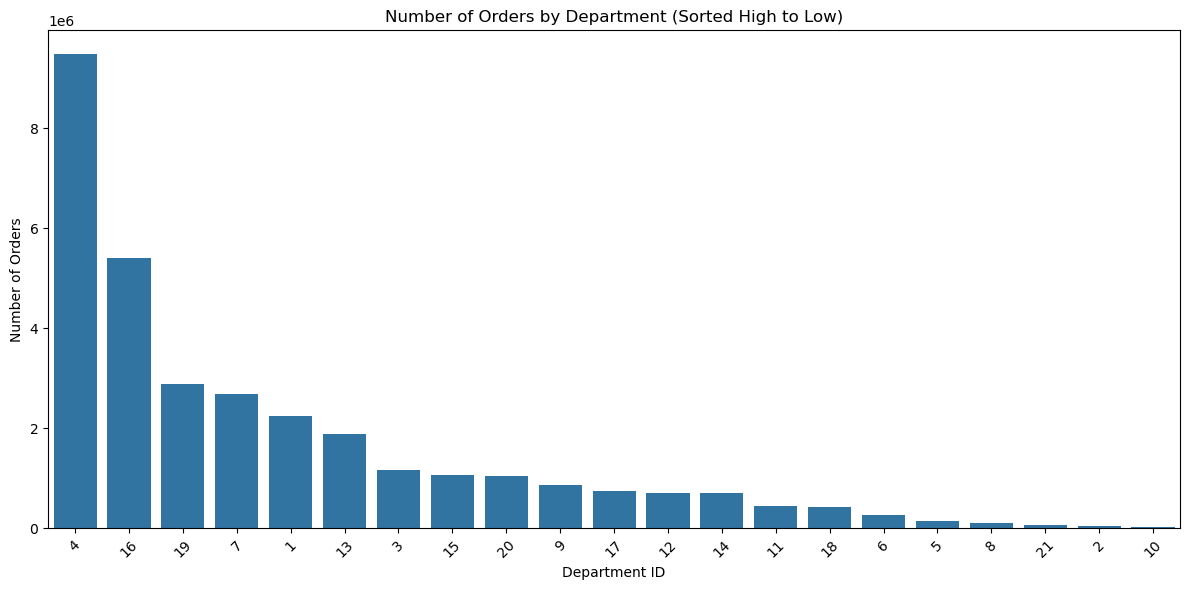

In [21]:
dept_counts = df['department_id'].value_counts()

# Create ordered category for plotting
ordered_departments = dept_counts.index

plt.figure(figsize=(12, 6))
sns.barplot(x=dept_counts.index, y=dept_counts.values, order=ordered_departments)
plt.title('Number of Orders by Department (Sorted High to Low)')
plt.xlabel('Department ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('orders_by_all_departments_sorted.png')
plt.show()

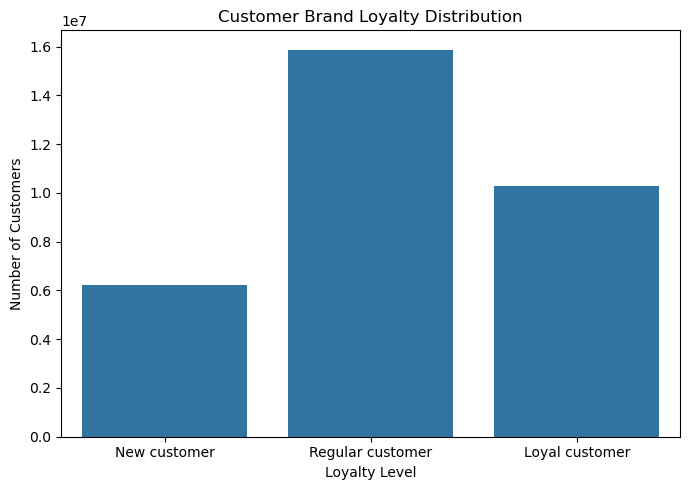

In [8]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='loyalty_flag', order=['New customer', 'Regular customer', 'Loyal customer'])
plt.title('Customer Brand Loyalty Distribution')
plt.xlabel('Loyalty Level')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('brand_loyalty_distribution.png')
plt.show()

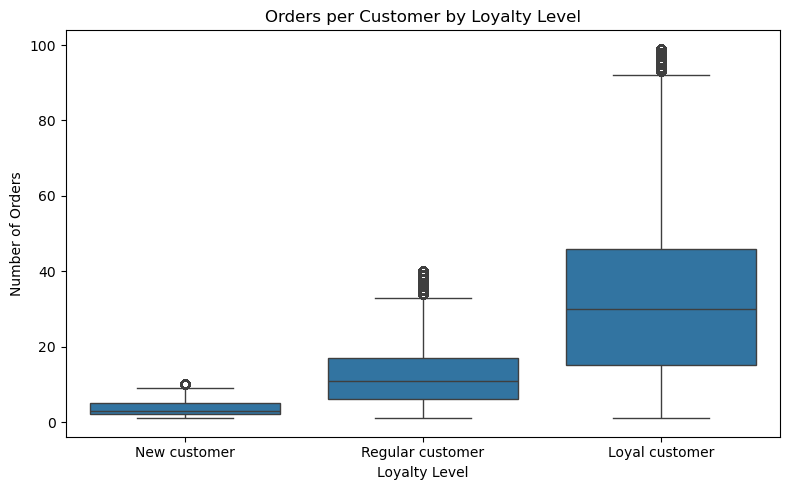

In [22]:
# Orders made by customers based on their loyalty flag
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='loyalty_flag', y='customer_order_count')
plt.title('Orders per Customer by Loyalty Level')
plt.xlabel('Loyalty Level')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig('orders_by_loyalty.png')
plt.show()

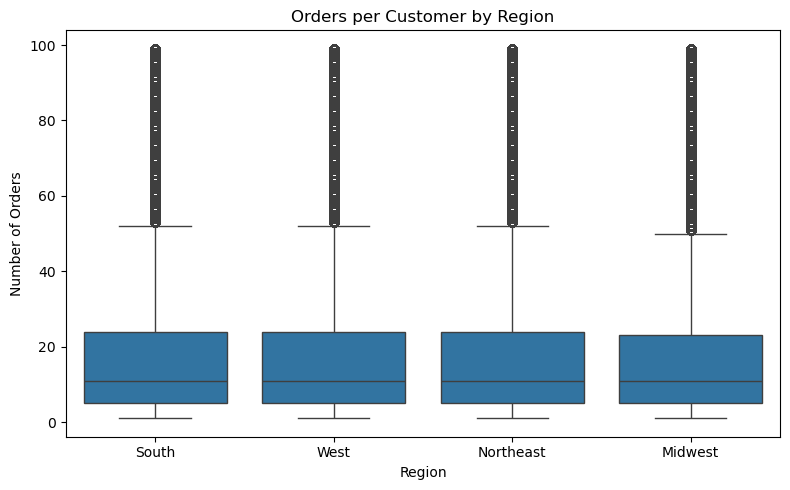

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Region', y='customer_order_count')
plt.title('Orders per Customer by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig('orders_by_region.png')
plt.show()

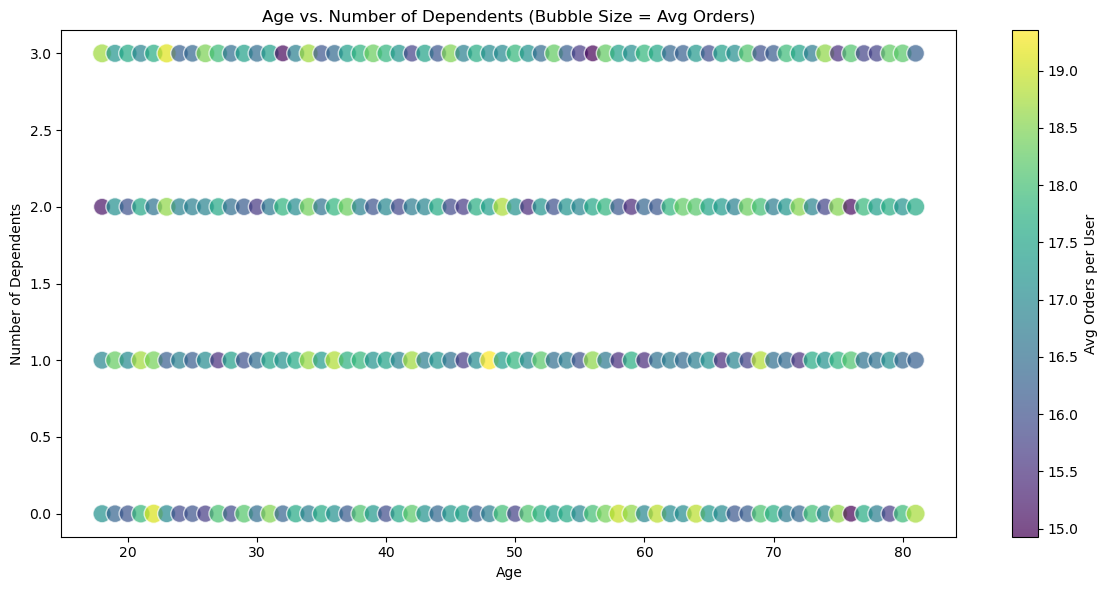

In [30]:
order_behavior = df.groupby(['age', 'n_dependants']).agg({
    'customer_order_count': 'mean',  # or 'sum' if you prefer total orders
    'user_id': 'count'       # count of users for reference
}).reset_index()

# Rename for clarity
order_behavior.rename(columns={'customer_order_count': 'avg_orders', 'user_id': 'user_count'}, inplace=True)

# Create scatter plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    data=order_behavior,
    x='age',
    y='n_dependants',
    s=order_behavior['avg_orders'] * 10,  # scale bubble size by avg orders
    c=order_behavior['avg_orders'],       # color by avg orders
    cmap='viridis',
    alpha=0.7,
    edgecolors='w'
)

plt.colorbar(scatter, label='Avg Orders per User')
plt.title('Age vs. Number of Dependents (Bubble Size = Avg Orders)')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')
plt.tight_layout()
plt.savefig('age_dependents_avg_orders_scatter.png')
plt.show()

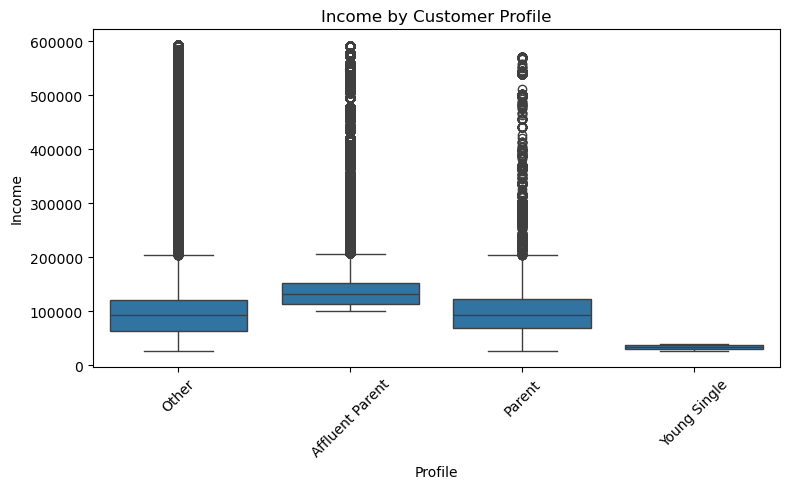

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='profile', y='income')
plt.title('Income by Customer Profile')
plt.xlabel('Profile')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('income_by_profile.png')
plt.show()

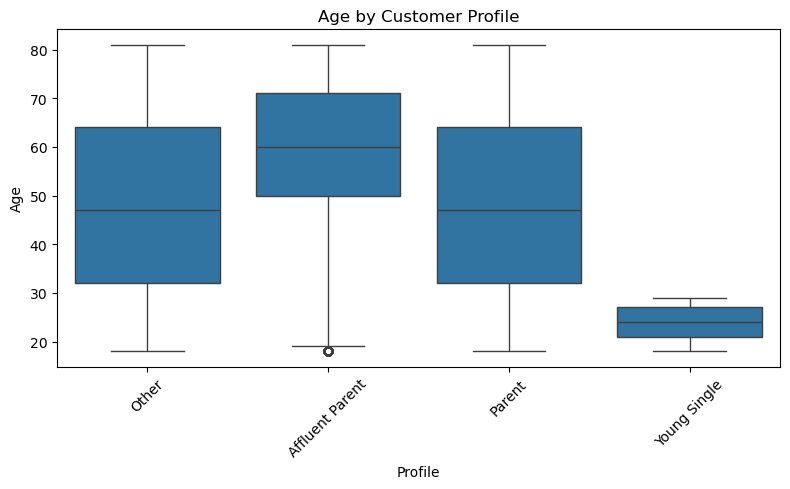

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='profile', y='age')
plt.title('Age by Customer Profile')
plt.xlabel('Profile')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('age_by_profile.png')
plt.show()

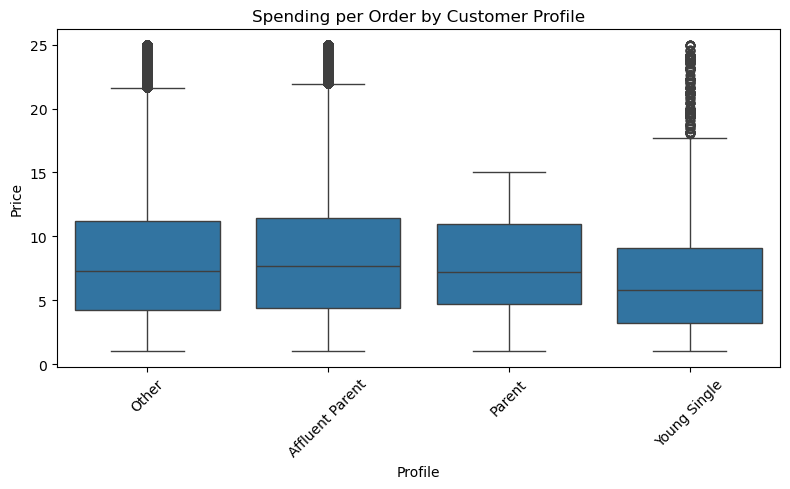

In [33]:
# Spending by profile
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='profile', y='prices')
plt.title('Spending per Order by Customer Profile')
plt.xlabel('Profile')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('spending_by_profile.png')
plt.show()

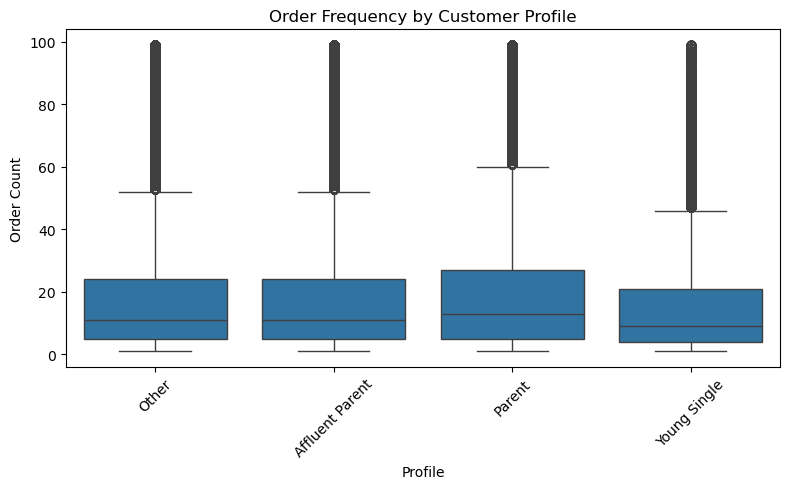

In [34]:
# Frequency of orders by profile
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='profile', y='customer_order_count')
plt.title('Order Frequency by Customer Profile')
plt.xlabel('Profile')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('orders_by_profile.png')
plt.show()

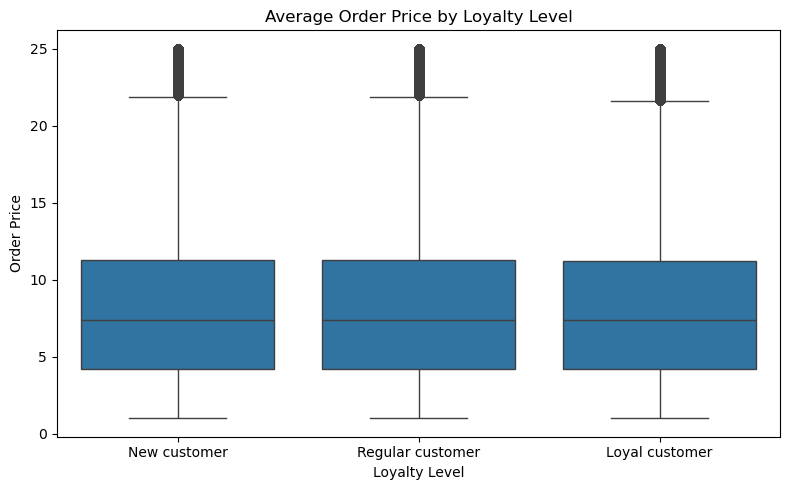

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='loyalty_flag', y='prices', order=['New customer', 'Regular customer', 'Loyal customer'])
plt.title('Average Order Price by Loyalty Level')
plt.xlabel('Loyalty Level')
plt.ylabel('Order Price')
plt.tight_layout()
plt.savefig('avg_price_by_loyalty.png')
plt.show()